In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clean YouTube video data

In [15]:
hbo = pd.read_csv('../data/hbo.csv')
netflix = pd.read_csv('../data/netflix.csv')
disney = pd.read_csv('../data/disney.csv')
amazon = pd.read_csv('../data/amazon.csv')

In [20]:
df = pd.concat((hbo, netflix, disney, amazon), ignore_index=True)

In [32]:
df['title_lowered'] = df.videoTitle.str.lower()
df['is_trailer'] = df.title_lowered.str.contains('trailer')
mask = df.is_trailer == True

In [73]:
df[mask].to_csv('../data/all_trailers.csv')

In [54]:
x = df[mask].title_lowered.str.split(' ').to_list()
x = [token for l in x for token in l ]
tokens, counts = np.unique(x, return_counts=True)

<BarContainer object of 10 artists>

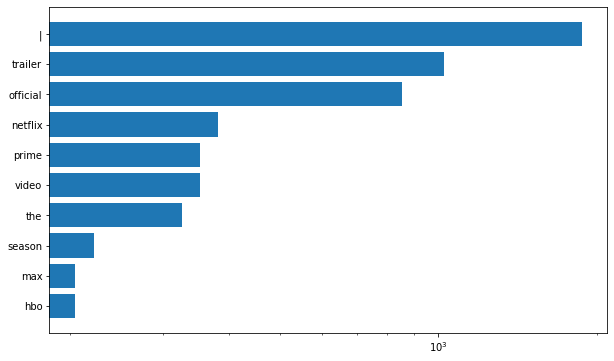

In [72]:
idx = np.argsort(-counts)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')

n_bars = 10
ax.barh(tokens[idx][:n_bars][::-1], counts[idx][:n_bars][::-1])

## Prepare IMDb data

In [2]:
basics = pd.read_csv('../imdb/title.basics.tsv', delimiter='\t')
akas = pd.read_csv('../imdb/title.akas.tsv', delimiter='\t')
ratings = pd.read_csv('../imdb/title.ratings.tsv', delimiter='\t')

<ipython-input-2-d0a14bae26e4>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv('imdb/title.basics.tsv', delimiter='\t')
<ipython-input-2-d0a14bae26e4>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv('imdb/title.akas.tsv', delimiter='\t')


In [8]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9405510,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9405511,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9405512,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9405513,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [10]:
df = basics.merge(ratings, on='tconst')

In [13]:
list(df)

['tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres',
 'averageRating',
 'numVotes']